# Predicting Abalone Age
## Phase 1: Data Preparation & Visualization
**Group Name: Group 29**

**Name(s) & ID(s) of Group Members:**


Chris Park (s3973667),
Henry Van Toledo (s3849054),
Luka Finn Shannon Hill (s3948396),
Wai Yan Lin (s3963096)
***

## Table of contents
* [Introduction](#itr)
    + [Dataset Source](#dataset-source)
    + [Dataset Details](#dataset-details)
    + [Dataset Variables](#dataset-variables)
    + [Response Variable](#response-variable)
* [Goals and Objectives](#goals-and-objectives)
***

## Introduction <a id="itr"></a>
### Dataset Source
The abalone dataset used in this notebook was sourced from the UCI machine learning repository which was provided in Akmand's dataset repository. This dataset contaiins several different attributes relating to an abalone's weights, measurements, gender and rings. The abalones from this dataset were collected from the Bass Strait, which is located between Australia and mainland Australia.

## Dataset Details

This dataset is simply about abalones and contains information on the properties of each individual abalone added to the database. These properties are the physical measurements, physical weights, gender, and the number of rings of an abalone. We will be using this data to predict the age of an abalone which is determined by the number of rings on it plus 1.5. **We will add this new variable to the dataset.** 

In [82]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None) 

# Imported the database that we obtained from the github repository provided in the modules
aba_df = pd.read_csv("https://raw.githubusercontent.com/akmand/datasets/main/abolone.csv")
aba_df = aba_df.assign(Age = aba_df.Rings + 1.5)
aba_df.sample(10, random_state=420)

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
190,M,0.615,0.480,0.180,1.1595,0.4845,0.2165,0.3250,13,14.5
4102,M,0.680,0.545,0.185,1.6720,0.7075,0.3640,0.4800,11,12.5
1293,I,0.520,0.400,0.130,0.5825,0.2330,0.1365,0.1800,10,11.5
1800,M,0.605,0.475,0.175,1.2525,0.5575,0.3055,0.3430,9,10.5
1167,M,0.620,0.470,0.135,1.0195,0.5315,0.2005,0.2475,8,9.5
1858,F,0.510,0.400,0.120,0.7005,0.3470,0.1105,0.1950,10,11.5
2804,F,0.660,0.505,0.190,1.4045,0.6255,0.3375,0.3745,9,10.5
714,M,0.350,0.255,0.080,0.1915,0.0800,0.0385,0.0630,9,10.5
108,F,0.510,0.390,0.135,0.6335,0.2310,0.1790,0.2000,9,10.5
75,F,0.600,0.475,0.150,1.0075,0.4425,0.2210,0.2800,15,16.5


## Dataset Variables

In [75]:
from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
         ['Gender','Nominal Catagorical','NA','M - Male \nF - Female \nI - Infant'],
         ['Length','Numeric', 'Millimeter', 'Longest shell measurement' ],
         ['Diameter', 'Numeric', 'Millimeter', 'Diameter of Abalone perpendicular to length' ],
         ['Height', 'Numeric', 'Millimeter', 'Height of abalone with meat in shell'],
         ['Whole weight', 'Numeric', 'Grams', 'Weight of whole abalone'],
         ['Shucked weight', 'Numeric', 'Grams', 'Weight of meat inside the abalone'],
         ['Shucked weight', 'Numeric', 'Grams', 'Weight of flesh after bleeding'],
         ['Shell weight', 'Numeric', 'Grams', 'Weight after being dried'],
         ['Rings', 'Numeric', 'Integer', 'Num of rings counted on the inside shell of the abalone' ],
         ['Age', 'Numeric', 'Years', 'Approximate age of the abalone calculated by adding 1.5 to number of shells']]
         
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════╤═════════════════════╤════════════╤═════════════════════════════════════════════════════════════════════════════╕
│ Name           │ Data Type           │ Units      │ Description                                                                 │
╞════════════════╪═════════════════════╪════════════╪═════════════════════════════════════════════════════════════════════════════╡
│ Gender         │ Nominal Catagorical │ NA         │ M - Male                                                                    │
│                │                     │            │ F - Female                                                                  │
│                │                     │            │ I - Infant                                                                  │
├────────────────┼─────────────────────┼────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ Length         │ Numeric             │ Millimeter │ Longest shell measurem

# Response Variable
For this study the response variable in our dataset will be the age of the abalone. We will be predicting the age of an abalone ( Number of rings + 1.5) by using the other variables in this dataset.

# Goals & Objectives
- being overfished
- Being able to determine the age of the abalone without needing to count the rings as counting the rings as to count the number of rings the abalone has to be killed
- **The age of Abalone is determined by cutting the shell through the cone and staining it and counting the number of rings through a microscope.** (I copied this)
- We will then be able to tell which abalones should be thrown back if fished as they are still not mature
- by doing this we will be able to avoid overfishing
- al

# Data Cleaning and Processing
Here we take steps to check and clean the data for our data prediction. Although the data in this dataset already seems cleaned we will still take steps to check if there might be anything that was missed. Also if there are attributes we seem irrevelant to our study they will be dropped. 


### Data Cleaning Steps
- Check for missing values
- Remove all the rows with missing values
- Random sampling of the dataset for 4000 rows

In [64]:
aba_df.columns

Index(['Gender', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings', 'Age'],
      dtype='object')

In [77]:
print(aba_df.isnull().sum())

gender            0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
age               0
dtype: int64


In [66]:
aba_df.columns = aba_df.columns.str.lower().str.strip()

columns_mapping = {
    'whole weight': 'whole_weight',
    'shucked weight': 'shucked_weight',
    'viscera weight': 'viscera_weight',
    'shell weight': 'shell_weight'
}

# rename columns
aba_df = aba_df.rename(columns = columns_mapping)
aba_df.sample(5, random_state=999)

,gender,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age
3259,M,0.640,0.505,0.165,1.4435,0.6145,0.3035,0.390,18,19.5
3583,F,0.625,0.500,0.175,1.2730,0.5640,0.3020,0.374,9,10.5
1932,F,0.620,0.495,0.170,1.0620,0.3720,0.2130,0.340,11,12.5
3328,I,0.575,0.475,0.170,0.9670,0.3775,0.2840,0.275,13,14.5
2426,I,0.565,0.435,0.155,0.7820,0.2715,0.1680,0.285,14,15.5


In [67]:
print(aba_df.dtypes)

gender             object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
age               float64
dtype: object


In [68]:
aba_df.describe(include='object').T

,count,unique,top,freq
gender,4177,3,M,1528


In [69]:
categoricalColumns = aba_df.columns[aba_df.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col)
    print(aba_df[col].unique())
    print('')

Unique values for gender
['M' 'F' 'I']



In [73]:
aba_df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
length,4000.0,0.524009,0.120237,0.0750,0.4500,0.54500,0.615000,0.8150
diameter,4000.0,0.407908,0.099373,0.0550,0.3500,0.42500,0.480000,0.6500
height,4000.0,0.139556,0.041999,0.0000,0.1150,0.14000,0.165000,1.1300
whole_weight,4000.0,0.828929,0.490470,0.0020,0.4410,0.79550,1.157125,2.8255
shucked_weight,4000.0,0.359463,0.221899,0.0010,0.1860,0.33475,0.504500,1.3510
viscera_weight,4000.0,0.180584,0.109380,0.0005,0.0935,0.17050,0.253125,0.7600
shell_weight,4000.0,0.238972,0.139502,0.0015,0.1300,0.23300,0.330000,1.0050
rings,4000.0,9.928500,3.219236,1.0000,8.0000,9.00000,11.000000,29.0000
age,4000.0,11.428500,3.219236,2.5000,9.5000,10.50000,12.500000,30.5000


In [70]:
aba_df = aba_df.sample(n=4000, random_state=420)
aba_df.sample(5, random_state=420)

,gender,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age
2574,M,0.480,0.370,0.100,0.5135,0.2430,0.1015,0.1350,8,9.5
3901,F,0.525,0.430,0.125,0.8130,0.3315,0.1660,0.1775,12,13.5
3054,M,0.600,0.450,0.150,0.8665,0.3695,0.1955,0.2550,12,13.5
224,I,0.425,0.380,0.105,0.3265,0.1285,0.0785,0.1000,10,11.5
2813,I,0.255,0.195,0.055,0.0725,0.0285,0.0170,0.0210,4,5.5


In [71]:
aba_df

,gender,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age
190,M,0.615,0.480,0.180,1.1595,0.4845,0.2165,0.3250,13,14.5
4102,M,0.680,0.545,0.185,1.6720,0.7075,0.3640,0.4800,11,12.5
1293,I,0.520,0.400,0.130,0.5825,0.2330,0.1365,0.1800,10,11.5
1800,M,0.605,0.475,0.175,1.2525,0.5575,0.3055,0.3430,9,10.5
1167,M,0.620,0.470,0.135,1.0195,0.5315,0.2005,0.2475,8,9.5
...,...,...,...,...,...,...,...,...,...,...
2094,I,0.405,0.305,0.090,0.2825,0.1140,0.0575,0.0950,7,8.5
894,I,0.240,0.175,0.065,0.0665,0.0310,0.0135,0.0170,3,4.5
1326,M,0.565,0.445,0.150,0.7960,0.3635,0.1840,0.2190,8,9.5
2407,I,0.625,0.430,0.175,1.4110,0.5720,0.2970,0.3950,12,13.5


# Data exploration and visualization
cleaned dataset will now be used to .......

### One-variable Plots Visualization
#### Bar Chart of Gender

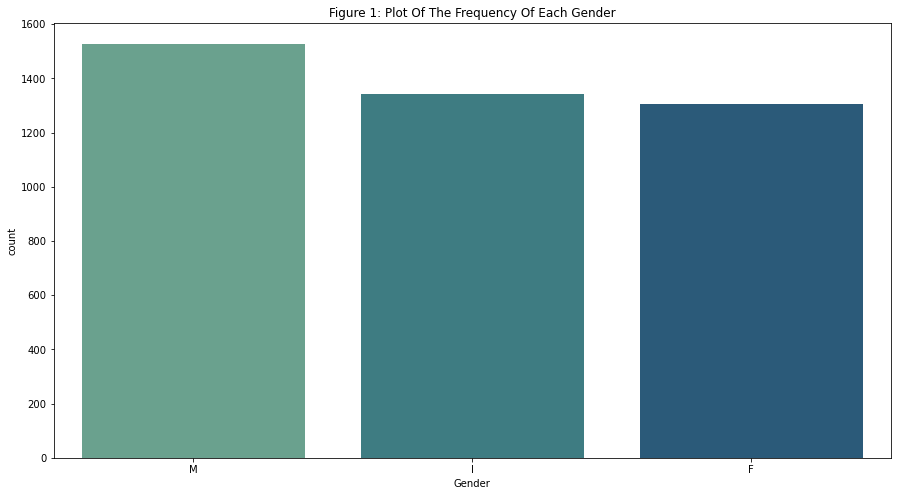

In [90]:
plt.figure(figsize = (15,8))
fig = sns.countplot(x = 'Gender', data = aba_df, palette = 'crest', order = aba_df['Gender'].value_counts().index) 
fig = plt.title('Figure 1: Plot Of The Frequency Of Each Gender')
plt.show()            


### Two-variable Plots Visualization

### Three-variable Plots Visualization